In [1]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

In [2]:
import os
from tqdm import tqdm
import torch
import torch.nn as nn
import torch.optim as optim
import time
import json
import numpy as np
from src import dataloader
from models import transformers, engine, configs, models
from models import models 
import ml_collections
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Check if there is GPU(s): {torch.cuda.is_available()}")

Check if there is GPU(s): True


### 4D with Patch Factorizing 

In [3]:
def SparkMET_4D_config():
    """Returns the ViT configuration."""
    config = ml_collections.ConfigDict()
    config.patches     = ml_collections.ConfigDict({'size': (8, 8)})
    config.embd_size   = 1024
    config.in_channels = 388
    config.in_times    = 4
    config.transformer = ml_collections.ConfigDict()
    config.transformer.mlp_dim = 512
    config.transformer.num_heads = 8
    config.transformer.num_layers = 6
    config.transformer.attention_dropout_rate = 0.0
    config.transformer.dropout_rate = 0.3
    config.transformer.Emb_M = 'Emb_2D_Patch'
    config.classifier = 'token'
    config.representation_size = None
    return config

In [4]:
Exp_name  = '4D_Emb2DPatch'
data_loader_training, data_loader_validate, data_loader_testing = dataloader.return_data_loaders(configs.data_config_dict, 
                                                                                                 configs.get_train_hyperparameter_config, 
                                                                                                 Exp_name)
model      = models.VisionTransformer(SparkMET_4D_config(), img_size=32, num_classes=2,).to(device)
loss_func  = torch.nn.NLLLoss() 
optimizer  = optim.Adam(model.parameters(), 
                        lr = configs.get_train_hyperparameter_config['lr'], 
                        weight_decay = configs.get_train_hyperparameter_config['wd'])

#================================ Summary of Dataset ==================#
number of training samples:   5460 | number of training fog cases:   103
number of validation samples: 2332 | number of validation fog cases: 31
number of test samples:       2228 | number of test fog cases:       67
#======================================================================#


Epoch 001: | Train Loss: 0.0899 | Val Loss: 0.1446 | Time(s): 437.797
Best model Saved! Val Loss: 0.1446
count: 0
Epoch 002: | Train Loss: 0.0613 | Val Loss: 0.1595 | Time(s): 407.315
Model is not saved! Current Val Loss: 0.1595
count: 1
Epoch 003: | Train Loss: 0.0682 | Val Loss: 0.1188 | Time(s): 414.683
Best model Saved! Val Loss: 0.1188
count: 0
Epoch 004: | Train Loss: 0.0621 | Val Loss: 0.0752 | Time(s): 419.115
Best model Saved! Val Loss: 0.0752
count: 0
Epoch 005: | Train Loss: 0.0606 | Val Loss: 0.1345 | Time(s): 416.635
Model is not saved! Current Val Loss: 0.1345
count: 1
Epoch 006: | Train Loss: 0.0607 | Val Loss: 0.1050 | Time(s): 412.376
Model is not saved! Current Val Loss: 0.1050
count: 2
Epoch 007: | Train Loss: 0.0519 | Val Loss: 0.0985 | Time(s): 417.074
Model is not saved! Current Val Loss: 0.0985
count: 3
Epoch 008: | Train Loss: 0.0504 | Val Loss: 0.1289 | Time(s): 416.300
Model is not saved! Current Val Loss: 0.1289
count: 4
Epoch 009: | Train Loss: 0.0504 | Val 

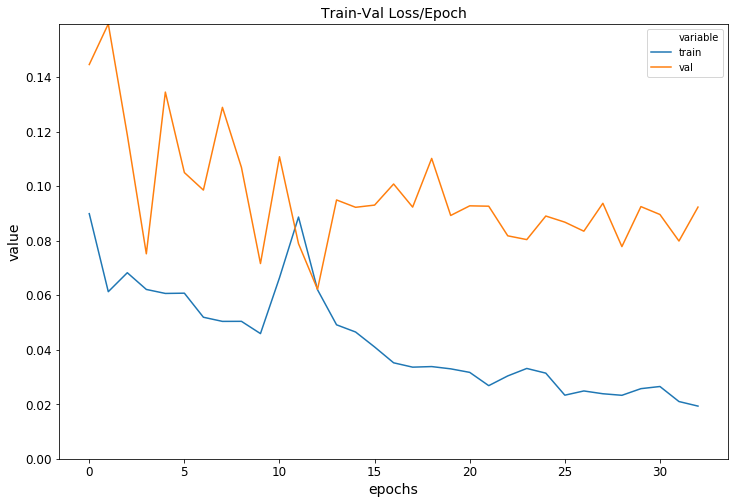

In [5]:
model, loss_stat = engine.train(model, optimizer, loss_func,
                                        configs.get_train_hyperparameter_config,
                                        data_loader_training, 
                                        data_loader_validate, 
                                        Exp_name) 

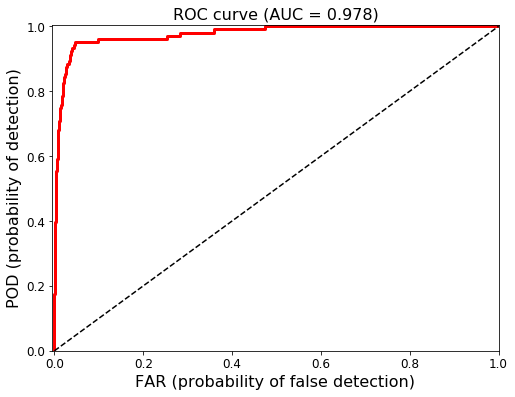

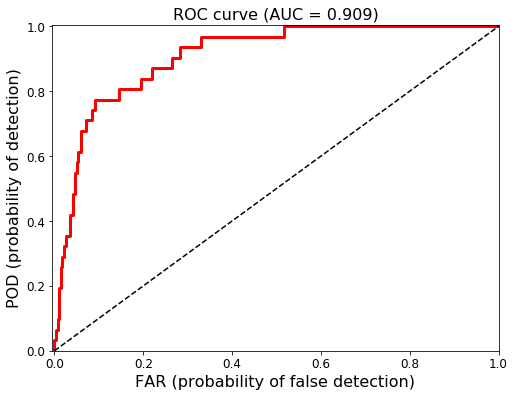

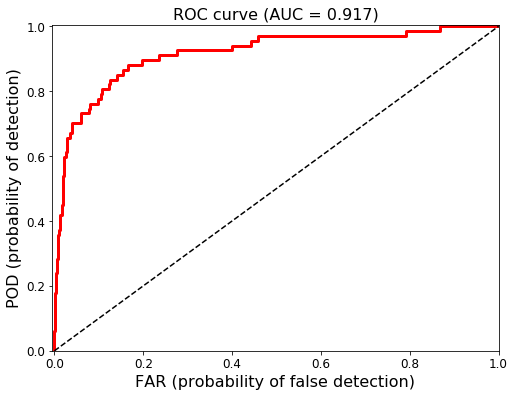

In [6]:
list_predictions, list_inputs, list_raw_attentio_scores, list_attention_gen_maps, list_attention_calc_scores = engine.predict(model, 
                                                data_loader_training, 
                                                data_loader_validate, 
                                                data_loader_testing,   
                                                Exp_name = Exp_name,) 

### 4D Patch with weight sampler

In [3]:
def SparkMET_4D_config():
    """Returns the ViT configuration."""
    config = ml_collections.ConfigDict()
    config.patches     = ml_collections.ConfigDict({'size': (8, 8)})
    config.embd_size   = 1024
    config.in_channels = 388
    config.in_times    = 4
    config.transformer = ml_collections.ConfigDict()
    config.transformer.mlp_dim = 512
    config.transformer.num_heads = 8
    config.transformer.num_layers = 6
    config.transformer.attention_dropout_rate = 0.0
    config.transformer.dropout_rate = 0.3
    config.transformer.Emb_M = 'Emb_2D_Patch'
    config.classifier = 'token'
    config.representation_size = None
    return config

In [4]:
Exp_name  = '4D_Emb2DPatch_WS'
data_loader_training, data_loader_validate, data_loader_testing = dataloader.return_data_loaders(configs.data_config_dict, 
                                                                                                 configs.get_train_hyperparameter_config, 
                                                                                                 Exp_name)
model      = models.VisionTransformer(SparkMET_4D_config(), img_size=32, num_classes=2,).to(device)
loss_func  = torch.nn.NLLLoss() 
optimizer  = optim.Adam(model.parameters(), 
                        lr = configs.get_train_hyperparameter_config['lr'], 
                        weight_decay = configs.get_train_hyperparameter_config['wd'])

#================================ Summary of Dataset ==================#
number of training samples:   5460 | number of training fog cases:   103
number of validation samples: 2332 | number of validation fog cases: 31
number of test samples:       2228 | number of test fog cases:       67
#======================================================================#


Epoch 001: | Train Loss: 0.1636 | Val Loss: 4.7207 | Time(s): 418.224
Best model Saved! Val Loss: 4.7207
count: 0
Epoch 002: | Train Loss: 0.0693 | Val Loss: 3.2329 | Time(s): 416.449
Best model Saved! Val Loss: 3.2329
count: 0
Epoch 003: | Train Loss: 0.1073 | Val Loss: 4.1339 | Time(s): 424.196
Model is not saved! Current Val Loss: 4.1339
count: 1
Epoch 004: | Train Loss: 0.0680 | Val Loss: 5.5817 | Time(s): 415.031
Model is not saved! Current Val Loss: 5.5817
count: 2
Epoch 005: | Train Loss: 0.0522 | Val Loss: 2.0121 | Time(s): 419.525
Best model Saved! Val Loss: 2.0121
count: 0
Epoch 006: | Train Loss: 0.0523 | Val Loss: 5.3660 | Time(s): 417.956
Model is not saved! Current Val Loss: 5.3660
count: 1
Epoch 007: | Train Loss: 0.0483 | Val Loss: 5.4163 | Time(s): 417.064
Model is not saved! Current Val Loss: 5.4163
count: 2
Epoch 008: | Train Loss: 0.0468 | Val Loss: 5.5527 | Time(s): 410.466
Model is not saved! Current Val Loss: 5.5527
count: 3
Epoch 009: | Train Loss: 0.0385 | Val 

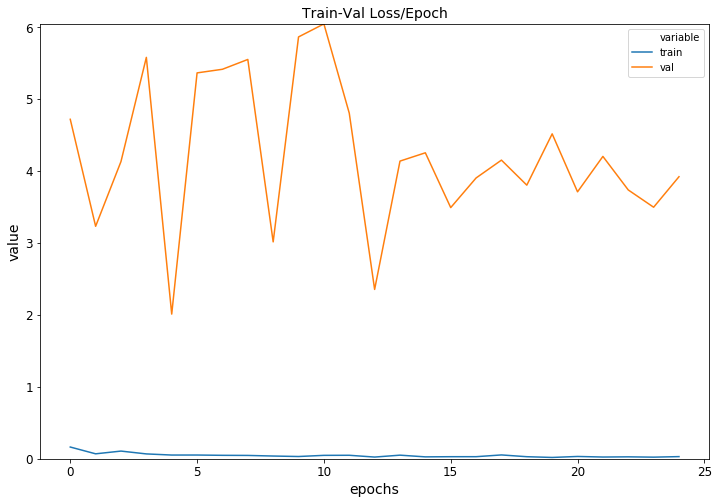

In [5]:
model, loss_stat = engine.train(model, optimizer, loss_func,
                                        configs.get_train_hyperparameter_config,
                                        data_loader_training, 
                                        data_loader_validate, 
                                        Exp_name) 

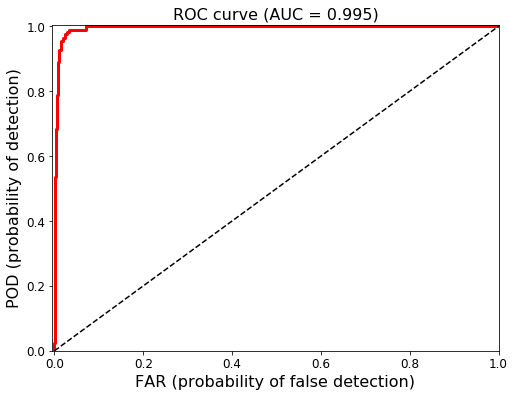

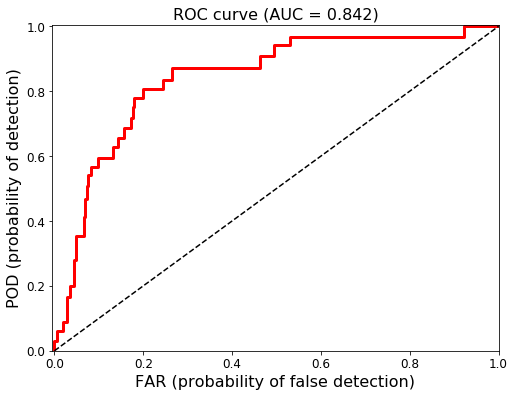

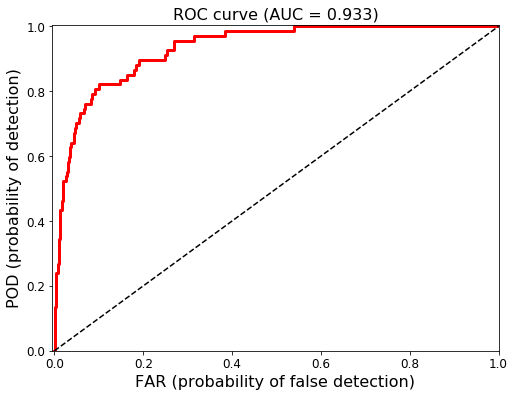

In [6]:
list_predictions, list_inputs, list_raw_attentio_scores, list_attention_gen_maps, list_attention_calc_scores = engine.predict(model, 
                                                data_loader_training, 
                                                data_loader_validate, 
                                                data_loader_testing,   
                                                Exp_name = Exp_name,) 

### WS V2

In [7]:
Exp_name  = '4D_Emb2DPatch_WS2'
data_loader_training, data_loader_validate, data_loader_testing = dataloader.return_data_loaders(configs.data_config_dict, 
                                                                                                 configs.get_train_hyperparameter_config, 
                                                                                                 Exp_name)
model      = models.VisionTransformer(SparkMET_4D_config(), img_size=32, num_classes=2,).to(device)
loss_func  = torch.nn.NLLLoss() 
optimizer  = optim.Adam(model.parameters(), 
                        lr = configs.get_train_hyperparameter_config['lr'], 
                        weight_decay = configs.get_train_hyperparameter_config['wd'])

#================================ Summary of Dataset ==================#
number of training samples:   5460 | number of training fog cases:   103
number of validation samples: 2332 | number of validation fog cases: 31
number of test samples:       2228 | number of test fog cases:       67
#======================================================================#


In [8]:
model, loss_stat = engine.train(model, optimizer, loss_func,
                                        configs.get_train_hyperparameter_config,
                                        data_loader_training, 
                                        data_loader_validate, 
                                        Exp_name) 


list_predictions, list_inputs, list_raw_attentio_scores, list_attention_gen_maps, list_attention_calc_scores = engine.predict(model, 
                                                data_loader_training, 
                                                data_loader_validate, 
                                                data_loader_testing,   
                                                Exp_name = Exp_name,) 

Epoch 001: | Train Loss: 0.1919 | Val Loss: 0.0964 | Time(s): 427.062
Best model Saved! Val Loss: 0.0964
count: 0
Epoch 002: | Train Loss: 0.0728 | Val Loss: 0.1628 | Time(s): 425.646
Model is not saved! Current Val Loss: 0.1628
count: 1
Epoch 003: | Train Loss: 0.0815 | Val Loss: 0.1279 | Time(s): 420.215
Model is not saved! Current Val Loss: 0.1279
count: 2
Epoch 004: | Train Loss: 0.0595 | Val Loss: 0.1093 | Time(s): 423.318
Model is not saved! Current Val Loss: 0.1093
count: 3
Epoch 005: | Train Loss: 0.0523 | Val Loss: 0.0992 | Time(s): 421.580
Model is not saved! Current Val Loss: 0.0992
count: 4
Epoch 006: | Train Loss: 0.0499 | Val Loss: 0.0897 | Time(s): 436.580
Best model Saved! Val Loss: 0.0897
count: 0
Epoch 007: | Train Loss: 0.0480 | Val Loss: 0.1486 | Time(s): 419.302
Model is not saved! Current Val Loss: 0.1486
count: 1
Epoch 008: | Train Loss: 0.0603 | Val Loss: 0.1746 | Time(s): 426.245
Model is not saved! Current Val Loss: 0.1746
count: 2


KeyboardInterrupt: 

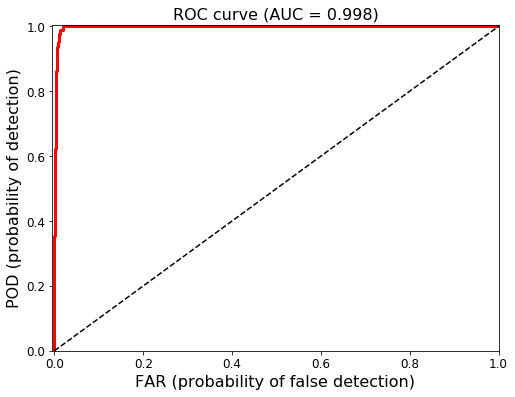

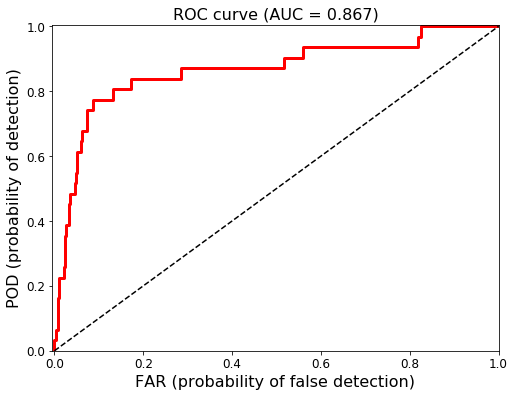

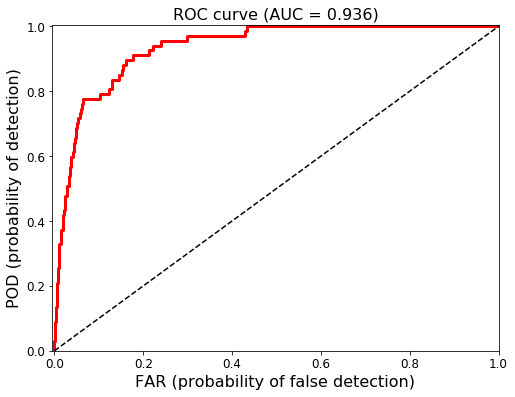

In [9]:

list_predictions, list_inputs, list_raw_attentio_scores, list_attention_gen_maps, list_attention_calc_scores = engine.predict(model, 
                                                data_loader_training, 
                                                data_loader_validate, 
                                                data_loader_testing,   
                                                Exp_name = Exp_name,) 